## Импортируем модули

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Открываем базу

In [2]:
cnx = sqlite3.connect(r'../db/my_database.db')

## Получаем данные из таблицы. Создаем dataframe. 

In [3]:
fields_list = ["id", "district", "rating_all", "rating_house", "rating_flat", "rating_infrastructure", "record_status", "price"]
fields = ', '.join(fields_list)
where = f"record_status = 2"
sql = f"SELECT {fields} FROM avito WHERE {where}"
df = pd.read_sql_query(sql, cnx)
df['price'] = df['price'].astype(int)
df['record_status'] = df['record_status'].astype(int)

In [4]:
df.head()

,id,district,rating_all,rating_house,rating_flat,rating_infrastructure,record_status,price
0,266841565,Фокинский,7.46,2.44,3,2.02,2,5100000
1,298431813,Бежицкий,13.85,4.15,5,4.70,2,4490000
2,308619904,Бежицкий,6.99,2.73,3,1.26,2,3800000
3,308852268,Советский,11.31,2.44,5,3.87,2,4500000
4,309396750,Бежицкий,11.21,3.29,5,2.92,2,4500000


In [5]:
df.isna().sum()

id                       0
district                 1
rating_all               0
rating_house             0
rating_flat              0
rating_infrastructure    0
record_status            0
price                    0
dtype: int64

In [6]:
df.describe()

,id,rating_all,rating_house,rating_flat,rating_infrastructure,record_status,price
count,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.0,7.700000e+01
mean,4.118370e+09,9.108442,3.335844,3.545455,2.227143,2.0,4.725844e+06
std,3.376627e+09,3.300725,1.020538,1.713303,1.442073,0.0,5.425951e+05
min,2.668416e+08,0.380000,0.380000,0.000000,0.000000,2.0,3.500000e+06
25%,3.207625e+08,7.810000,2.820000,3.000000,0.920000,2.0,4.400000e+06
50%,4.398025e+09,9.870000,3.440000,4.000000,2.330000,2.0,4.800000e+06
75%,7.599634e+09,11.290000,4.220000,5.000000,3.210000,2.0,5.100000e+06
max,7.795348e+09,13.850000,4.690000,6.000000,5.040000,2.0,5.500000e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     77 non-null     int64  
 1   district               76 non-null     object 
 2   rating_all             77 non-null     float64
 3   rating_house           77 non-null     float64
 4   rating_flat            77 non-null     int64  
 5   rating_infrastructure  77 non-null     float64
 6   record_status          77 non-null     int64  
 7   price                  77 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 4.9+ KB


## Построение диаграм распредеения рейтингов

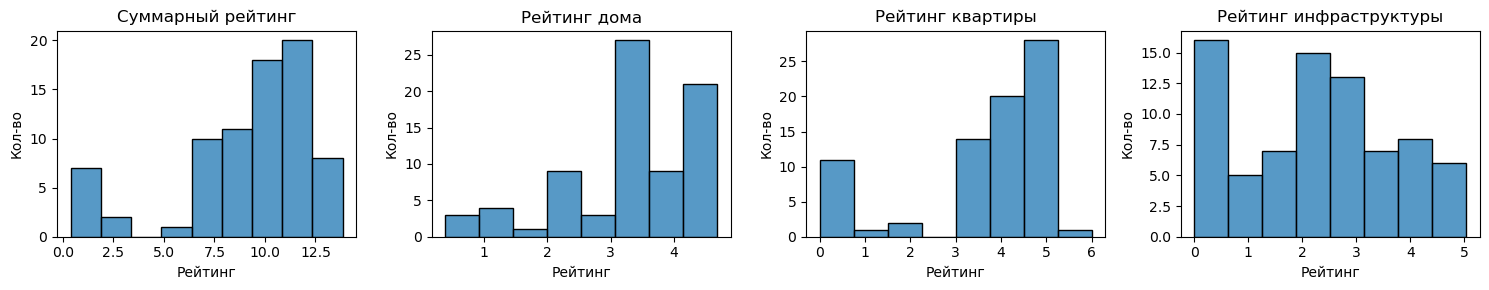

In [8]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 3))

# Plot on the first subplot
sns.histplot(data=df["rating_all"], ax=ax1)
ax1.title.set_text('Суммарный рейтинг')
ax1.set_xlabel('Рейтинг')
ax1.set_ylabel('Кол-во')

# Plot on the second subplot
sns.histplot(data=df["rating_house"], ax=ax2)
ax2.title.set_text('Рейтинг дома')
ax2.set_xlabel('Рейтинг')
ax2.set_ylabel('Кол-во')

# Plot on the third subplot
sns.histplot(data=df["rating_flat"], ax=ax3)
ax3.title.set_text('Рейтинг квартиры')
ax3.set_xlabel('Рейтинг')
ax3.set_ylabel('Кол-во')

sns.histplot(data=df["rating_infrastructure"], ax=ax4)
ax4.title.set_text('Рейтинг инфраструктуры')
ax4.set_xlabel('Рейтинг')
ax4.set_ylabel('Кол-во')

# Adjust the spacing between plots
plt.tight_layout()

# Display the plot
plt.show()

## Получение данных по среднему значению ТОП3 общего рейтинга по каждому району

In [9]:
df_rating = df.copy()

districts = df_rating.groupby("district").groups.keys()
ratings = ["rating_all", "rating_house", "rating_flat", "rating_infrastructure"]
data = {
    "districts": districts,
    "rating_all": None,
    "rating_house": None,
    "rating_flat": None,
    "rating_infrastructure": None,
}
for rating in ratings:
    df_rating['row_num'] = df_rating.groupby('district')[rating].rank(method='first', ascending=False)
    top_3 = df_rating[df_rating['row_num'] <= 3]
    result = top_3.groupby('district', as_index=False)[rating].mean().round(2)
    data[rating] = result[rating].tolist()

## Таблица рейтингов по районам

In [10]:
df_rating = pd.DataFrame(data)
df_rating

,districts,rating_all,rating_house,rating_flat,rating_infrastructure
0,Бежицкий,13.14,4.68,5.33,4.38
1,Володарский,12.90,4.39,5.00,4.23
2,Советский,12.01,4.20,5.00,4.69
3,Фокинский,10.82,3.89,5.00,2.84


### Районы с самой дорогой средней стоимостью квартиры

In [11]:
d = df.groupby("district",  as_index=False)["price"].mean().round(2).sort_values(by='price', ascending=False)
d

,district,price
2,Советский,5117222.17
3,Фокинский,4887500.00
0,Бежицкий,4623499.97
1,Володарский,4389062.44


In [12]:
df.describe()

,id,rating_all,rating_house,rating_flat,rating_infrastructure,record_status,price
count,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.0,7.700000e+01
mean,4.118370e+09,9.108442,3.335844,3.545455,2.227143,2.0,4.725844e+06
std,3.376627e+09,3.300725,1.020538,1.713303,1.442073,0.0,5.425951e+05
min,2.668416e+08,0.380000,0.380000,0.000000,0.000000,2.0,3.500000e+06
25%,3.207625e+08,7.810000,2.820000,3.000000,0.920000,2.0,4.400000e+06
50%,4.398025e+09,9.870000,3.440000,4.000000,2.330000,2.0,4.800000e+06
75%,7.599634e+09,11.290000,4.220000,5.000000,3.210000,2.0,5.100000e+06
max,7.795348e+09,13.850000,4.690000,6.000000,5.040000,2.0,5.500000e+06
